In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
df=pd.read_csv("/Users/lambardaar/Desktop/STUDY/python/ml/ca_practice/cars.csv")
df.head(5)

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [18]:
conti=[ "(kW)",
    "CITY (kWh/100 km)",
    "HWY (kWh/100 km)",
    "COMB (kWh/100 km)",
    "CITY (Le/100 km)",
    "HWY (Le/100 km)",
    "COMB (Le/100 km)",
    "(g/km)",
    "(km)",
    "TIME (h)"]

In [19]:
print(df[conti].describe())

             (kW)  CITY (kWh/100 km)  HWY (kWh/100 km)  COMB (kWh/100 km)  \
count   53.000000           53.00000         53.000000          53.000000   
mean   190.622642           19.64717         21.633962          20.541509   
std    155.526429            3.00100          1.245753           1.979455   
min     35.000000           15.20000         18.800000          16.800000   
25%     80.000000           17.00000         20.800000          18.700000   
50%    107.000000           19.00000         21.700000          20.000000   
75%    283.000000           22.40000         22.500000          22.100000   
max    568.000000           23.90000         23.300000          23.600000   

       CITY (Le/100 km)  HWY (Le/100 km)  COMB (Le/100 km)  (g/km)  \
count         53.000000        53.000000         53.000000    53.0   
mean           2.207547         2.422642          2.301887     0.0   
std            0.344656         0.143636          0.212576     0.0   
min            1.700000   

                       (kW)  CITY (kWh/100 km)  HWY (kWh/100 km)  \
(kW)               1.000000           0.827555          0.046083   
CITY (kWh/100 km)  0.827555           1.000000          0.442151   
HWY (kWh/100 km)   0.046083           0.442151          1.000000   
COMB (kWh/100 km)  0.706847           0.965258          0.657155   
CITY (Le/100 km)   0.823125           0.996966          0.447289   
HWY (Le/100 km)    0.047220           0.437810          0.986524   
COMB (Le/100 km)   0.721353           0.966911          0.623550   
(g/km)                  NaN                NaN               NaN   
(km)               0.894615           0.906960          0.166217   
TIME (h)           0.757326           0.806459          0.316639   

                   COMB (kWh/100 km)  CITY (Le/100 km)  HWY (Le/100 km)  \
(kW)                        0.706847          0.823125         0.047220   
CITY (kWh/100 km)           0.965258          0.996966         0.437810   
HWY (kWh/100 km)          

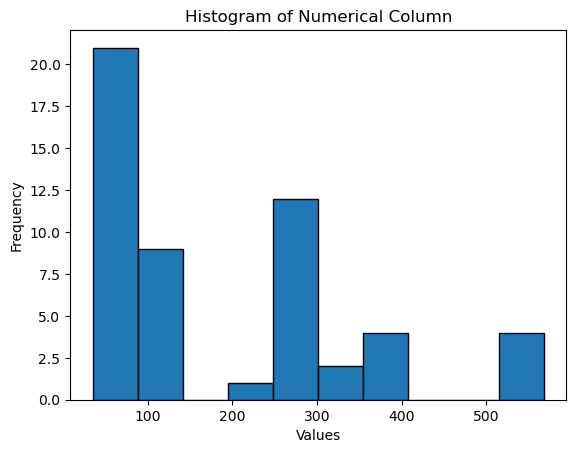

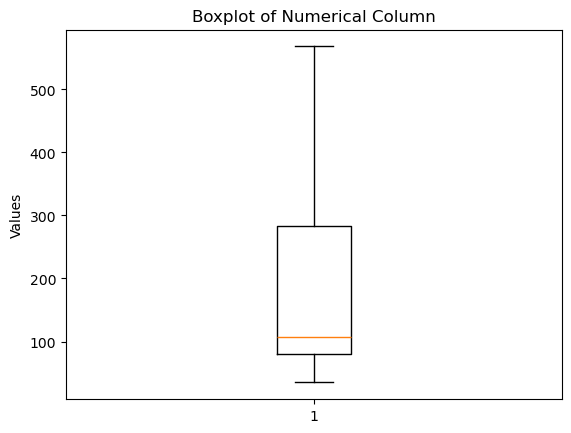

In [20]:
print(df[conti].corr())

plt.hist(df['(kW)'], edgecolor='black')
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Numerical Column")
plt.show()

plt.boxplot(df['(kW)'])
plt.title("Boxplot of Numerical Column")
plt.ylabel("Values")
plt.show()



In [21]:
df.head(3)

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4


0.9961927449728039


/var/folders/2c/cq9fl3r13k327hnpyh8w9j0c0000gn/T/ipykernel_24145/3753838827.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


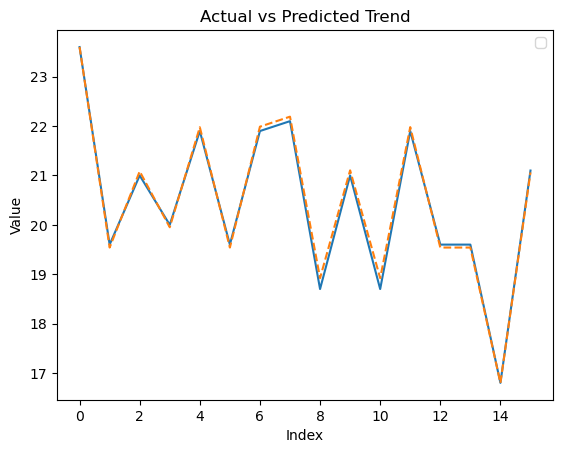

In [31]:
num_data=['(kW)', "CITY (kWh/100 km)",
    "HWY (kWh/100 km)",
    "CITY (Le/100 km)",
    "HWY (Le/100 km)",
    "COMB (Le/100 km)",
    "(g/km)",
    "(km)",
    "TIME (h)"]

X=df[num_data]
y=df['COMB (kWh/100 km)']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

sc=StandardScaler()


X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

ml=LinearRegression()
ml.fit(X_train_scaled,y_train)

pred=ml.predict(X_test_scaled)
print(r2_score(y_test,pred))
# 0.9961927449728042

plt.plot(y_test.values)
plt.plot(pred, linestyle="dashed")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Trend")
plt.legend()
plt.show()


In [23]:
df1=pd.read_csv("/Users/lambardaar/Desktop/STUDY/python/ml/ca_practice/mushrooms.csv")
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [24]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df1.select_dtypes(include=['object']).columns
for c in categorical_cols:
    le=LabelEncoder()
    df1[c]=le.fit_transform(df1[c])

df1.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [25]:
X=df1.drop('class',axis=1)
y=df1['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_test,y_test)

pred=knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))







Accuracy: 0.9893355209187858


In [38]:
new=pd.DataFrame({    "Makee": ["Ford", "Nissan", "Mitsubishi"],
})
df=pd.concat([df,new])
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h),Makee
0,2012.0,MITSUBISHI,i-MiEV,SUBCOMPACT,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0.0,NaN,100.0,7.0,NaN
1,2012.0,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0.0,NaN,117.0,7.0,NaN
2,2013.0,FORD,FOCUS ELECTRIC,COMPACT,107.0,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0.0,NaN,122.0,4.0,NaN
3,2013.0,MITSUBISHI,i-MiEV,SUBCOMPACT,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0.0,NaN,100.0,7.0,NaN
4,2013.0,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0.0,NaN,117.0,7.0,NaN
